# Title: Website Phishing Classification
## Problem Statement:

The objective of this project is to develop an accurate and efficient system for classifying websites as phishing or non-phishing based on a given set of characteristics. Phishing websites are malicious online platforms that aim to deceive users into revealing sensitive information, such as login credentials or financial details, by imitating trustworthy websites. Detecting and identifying phishing websites is crucial in safeguarding users from potential fraud, privacy breaches, and financial losses.

### Phishing
A phishing website is a malicious website that is designed to trick users into entering their personal or financial information. These websites are often designed to look like legitimate websites, such as those of banks, credit card companies, or online retailers. Once a user enters their information on a phishing website, the phisher can use it to commit identity theft or other crimes.

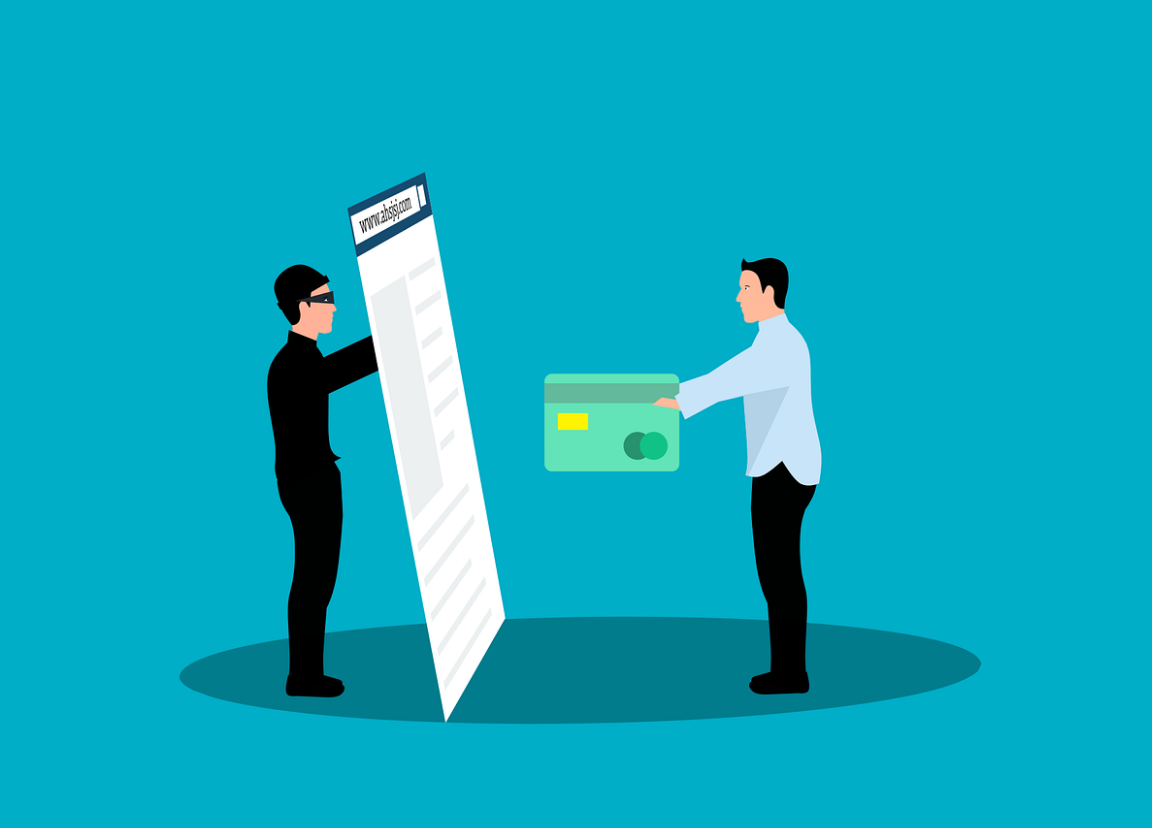

**Phishing websites** are a major threat to online security. They are designed to trick users into entering their personal or financial information, which can then be used for identity theft or other crimes. Phishing websites are becoming increasingly sophisticated, making them more difficult to detect.
<br/>
Phishing website detection is important for a number of reasons. First, it can help to protect users from identity theft and other crimes. Second, it can help to reduce the financial losses that are caused by phishing attacks. Third, it can help to improve the overall security of the internet.
<br/>
There are a number of different methods that can be used to detect phishing websites. These methods include:
<br/>
- **Blacklists:** Phishing websites can be added to blacklists, which are lists of known malicious websites. Browsers and other software can then be used to block access to these websites.
- **Whitelists:** Whitelists are lists of known legitimate websites. Browsers and other software can then be used to only allow access to websites that are on the whitelist.
- **Machine learning:** Machine learning can be used to identify phishing websites based on their characteristics. This is a more sophisticated approach than blacklists and whitelists, but it can also be more effective.
<br/>
Phishing website detection is an important part of online security. By using the right methods, it is possible to help protect users from phishing attacks and the harm that they can cause.
<br/>
Here are some additional benefits of phishing website detection:
<br/>
- It can help to improve the public's awareness of phishing attacks.
- It can help to reduce the number of phishing emails that are sent.
- It can help to make the internet a more secure place for everyone.

### Data source: https://archive.ics.uci.edu/dataset/327/phishing+websites
Mohammad,Rami and McCluskey,Lee. (2015). Phishing Websites. UCI Machine Learning Repository. https://doi.org/10.24432/C51W2X.

In [2]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from IPython.display import display, HTML
import scipy.stats as stats
import warnings
import pickle
warnings.filterwarnings('ignore')

In [3]:
# Loading the datainto the dataframe 
raw_data = loadarff('Training Dataset.arff')
df = pd.DataFrame(raw_data[0])

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


Data is not in the desired format so we need to convert it into proper format.</br>
In arff format the missing data is represented as '?' so we must replace '?' with nan values.

In [5]:
def modify_data(data):
    if data == '?':
        return np.nan
    res = str(data)
    res = res.replace('b','')
    res = res.replace("'",'')
    return int(res)

In [6]:
# modifying the data into proper format
for i in df.columns:
    df[i] = df[i].apply(modify_data)

In [7]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [9]:
# Checking for null values 
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Our data is in proper format we don't have any null values, so no need to the missing data imputation.

In [10]:
# Storing the dataframe which is in proper format into the csv file
df.to_csv('clean_data.csv')

### Description of Features

**1. having_ip_address**
- If the Domain Part has an IP Address then -1
- If the Domain Part doesn't have IP Address then 1


**2. URL_Length**
- URL length<54 then -1
- URL length >= 54 and URL length <= 75 then 0
- URL length > 75 then 1

**3. Shortining_Service**
- TinyURL then -1
- Normal URL then 1

**4. having_At_Symbol**
- URL having @ symbol then -1
- URL doesn't contain @ then 1

**5. double_slash_redirect**
- The position of the last occurrence of "//" in the URL > 7 then -1
- Otherwise 1

**6. Prefix_Suffix**
- Domain part includes symbol '-' then -1
- Domain doesn't contain symbol '-' then 1

**7. having_Sub_Domain**
- If there is one dot in the domain part then 1
- If there are two dot in domain part then 0
- If there are more than three dots in domain part then -1

**8. SSLfinal_State**
- Use HTTPS and issuer is trusted and age of certificate≥ 1 Years then 1
- Use HTTPS but issuer is not trusted then 0
- Otherwise 1

**9. Domain_registration_length**
- Domains Expires on ≤ 1 years then -1
- Otherwise 1 

**10. Favicon**
- Favicon Loaded From External Domain then -1
- Otherwise 1

**11. port**
- Port # is of the Preffered Status then 1
- Otherwise -1

**12. HTTPS_token**
- Using HTTP token in domain part of The URL then 1
- Otherwise -1

**13. Request_URL** 
Request URL examines whether the external objects contained within a webpage such as images, videos and sounds are loaded from another domain. In legitimate webpages, the webpage address and most of objects embedded within the webpage are sharing the same domain. 
- % of Request URL <22%  then 1
- otherwise -1

**14. URL_of_Anchor**
- If % of URL Of Anchor < 31% then 1
- If % of URL Of Anchor >=31 and <= 67% then 0
- If % of URL Of Anchor > 67% then 1

**15. Links_in_tags**
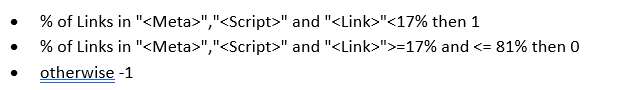

**16. SFH**
- Server Form Handler 
- SFH is "about: blank" Or Is Empty then -1
- SFH "Refers To " A Different Domain then 0
- Otherwise 1

**17. Submitting_to_email**
- If website is using "mail()" or "mailto:" function to submit user information then -1
- Otherwise 1

**18. Abnormal_URL**
- If Host name is not included in URL then 1
- Otherwise 1

**19. Redirect**
- If number of redirects is less than 1 then 1
- Otherwise -1

**20. on_mouseover**
- If the status bar changes on mouseover then -1
- Otherwise 1

**21. RightClick**
- If rightclick is disabled then -1
- Otherwise 1

**22. popUpWindow**
- If the popup window contains text then -1
- Otherwise 1

**23. Iframe**
- If the website is using iframe then -1
- Otherwise 1

**24. age_of_domain**
- If age of domain is greater than 6 months then 1
- Otherwise 1

**25. DNSRecord**
- If there is no DNS record for the given domain then -1
- Otherwise 1

**26. web_traffic**
- If Website rank < 100,000 then 1
- If Website rank > 100,000 then 0
- Otherwise -1

**27. PageRank**
- If PageRank < 0.2 then -1
- Otherwise 1

**28. Google_Index**
- If webpage indexed by Google then 1
- Otherwise -1

**29. Links_pointing_to_page**
- If no of links pointing to the webpage is 0 then -1
- If no of links pointing to the webpage is 1 or 2 then 0
- Otherwise 1

**30. Statistical Report**
- If Host belongs to top Phishing IPs then -1
- otherwise 1

**31. Result**
- If website is non phishing then 1
- If website is phishing website then -1

### Exploratory Data Analysis 

### Univariate Analysis and Column description 

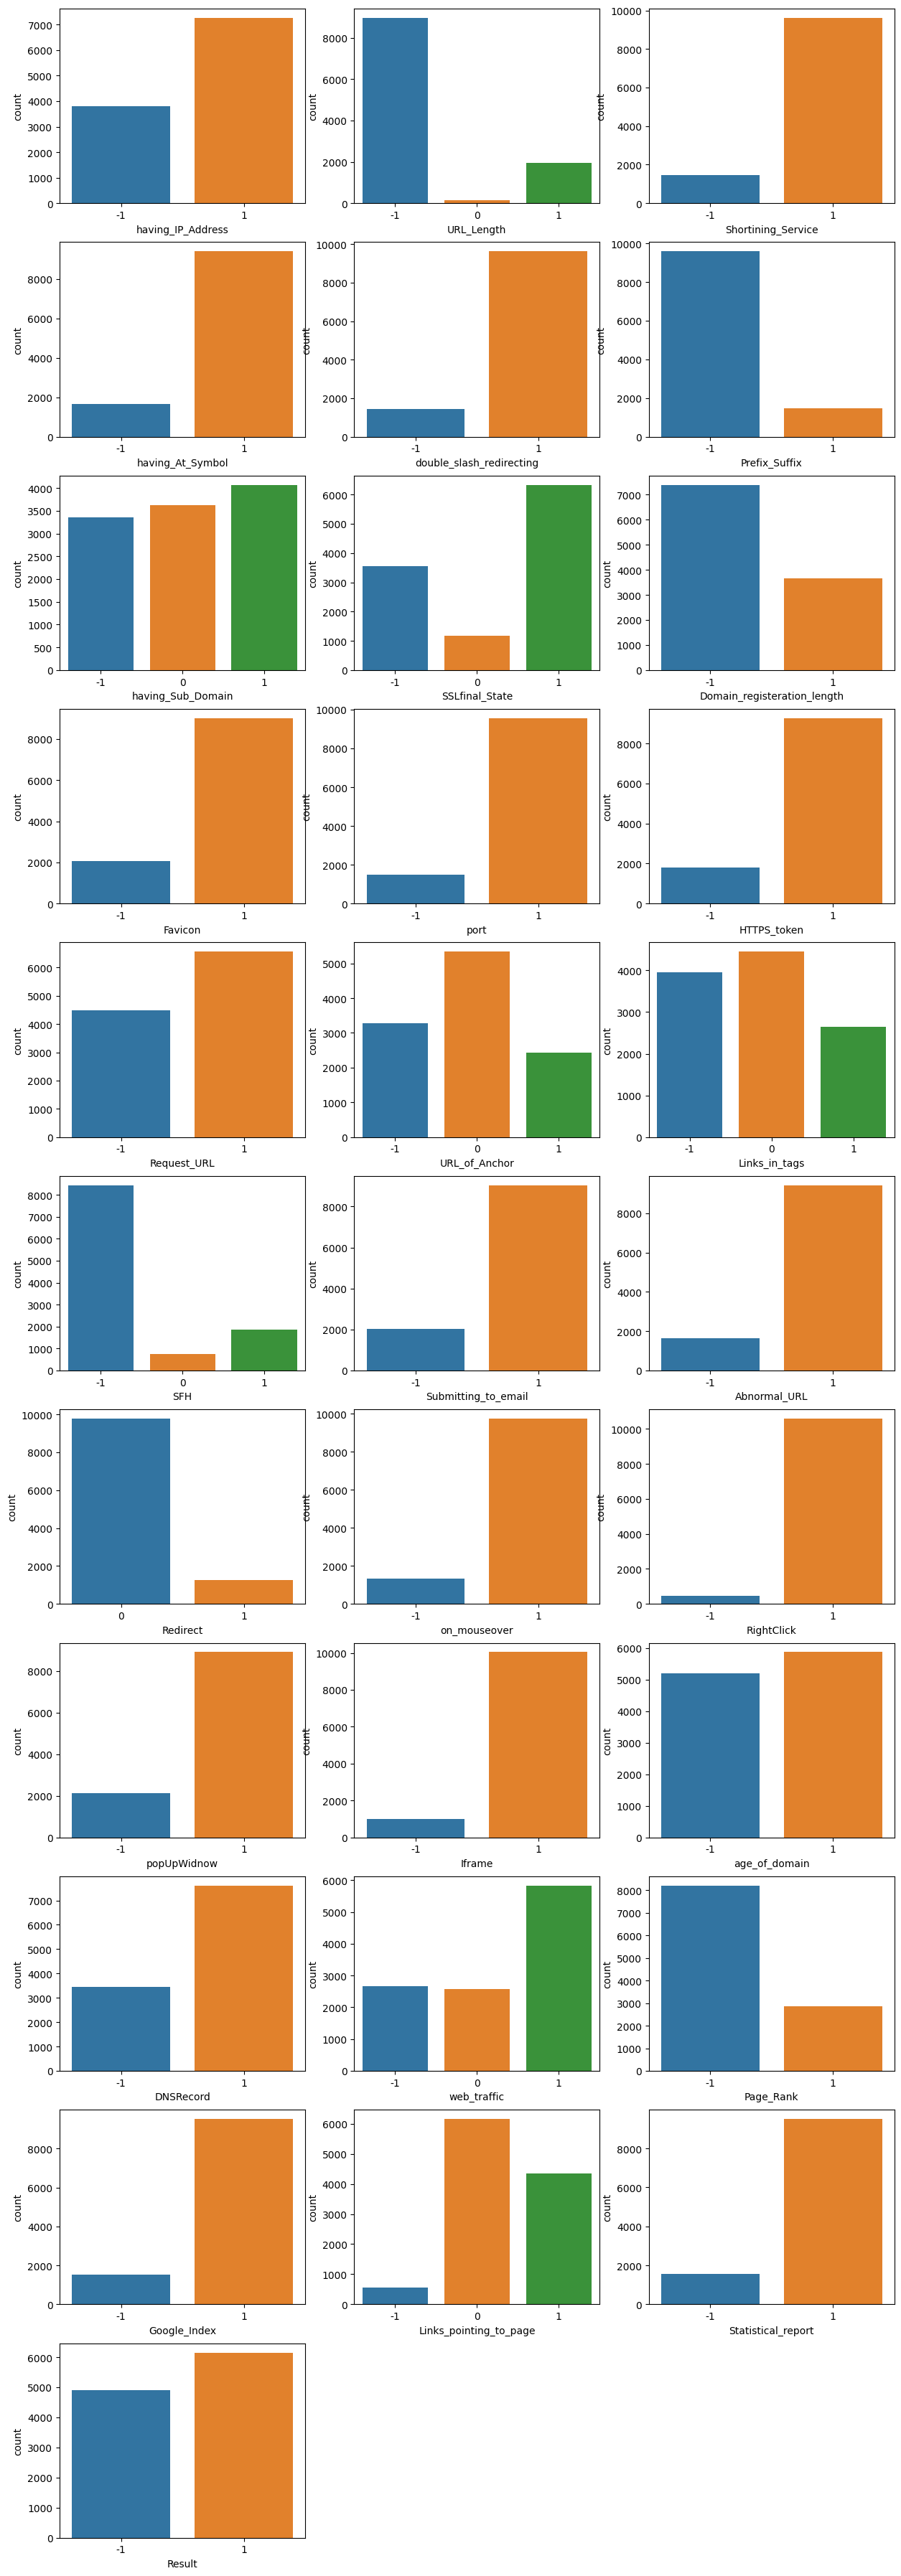

In [10]:
plt.figure(figsize=(15,50))
pltnumber =1

for column in df:
    ax = plt.subplot(12,3,pltnumber)
    sns.countplot(data = df,x=column)
    plt.xlabel(column,fontsize=10)
    pltnumber+=1
plt.show()

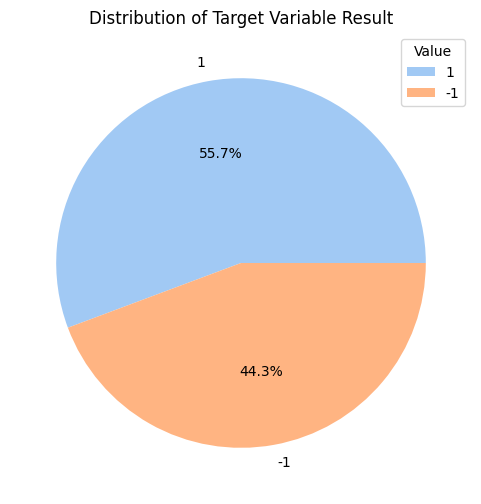

In [14]:
# Count the occurrences of each value in the column
value_counts = df['Result'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add count and percentage information to the chart
plt.gca().set_aspect('equal')
plt.legend(title='Value', loc='upper right')
plt.title('Distribution of Target Variable Result')

# Display the pie chart
plt.show()

### Observations
- All the data is in numeric format.
- We have total of 11055 entries.
- Data is almost balanced we have around 5000 for -1 and 6000 for +1.
- Most of the URL Length is less than 54.
- Most of the website have rightclik and on mouse over enabled.
- Most of the websites have popup windows have text.
- Most of the url is not abnormal.
- Most of the SFH is not empty and is legitimate.
- Most of the websites in the dataset donot redirect.

### Bivariate Analysis

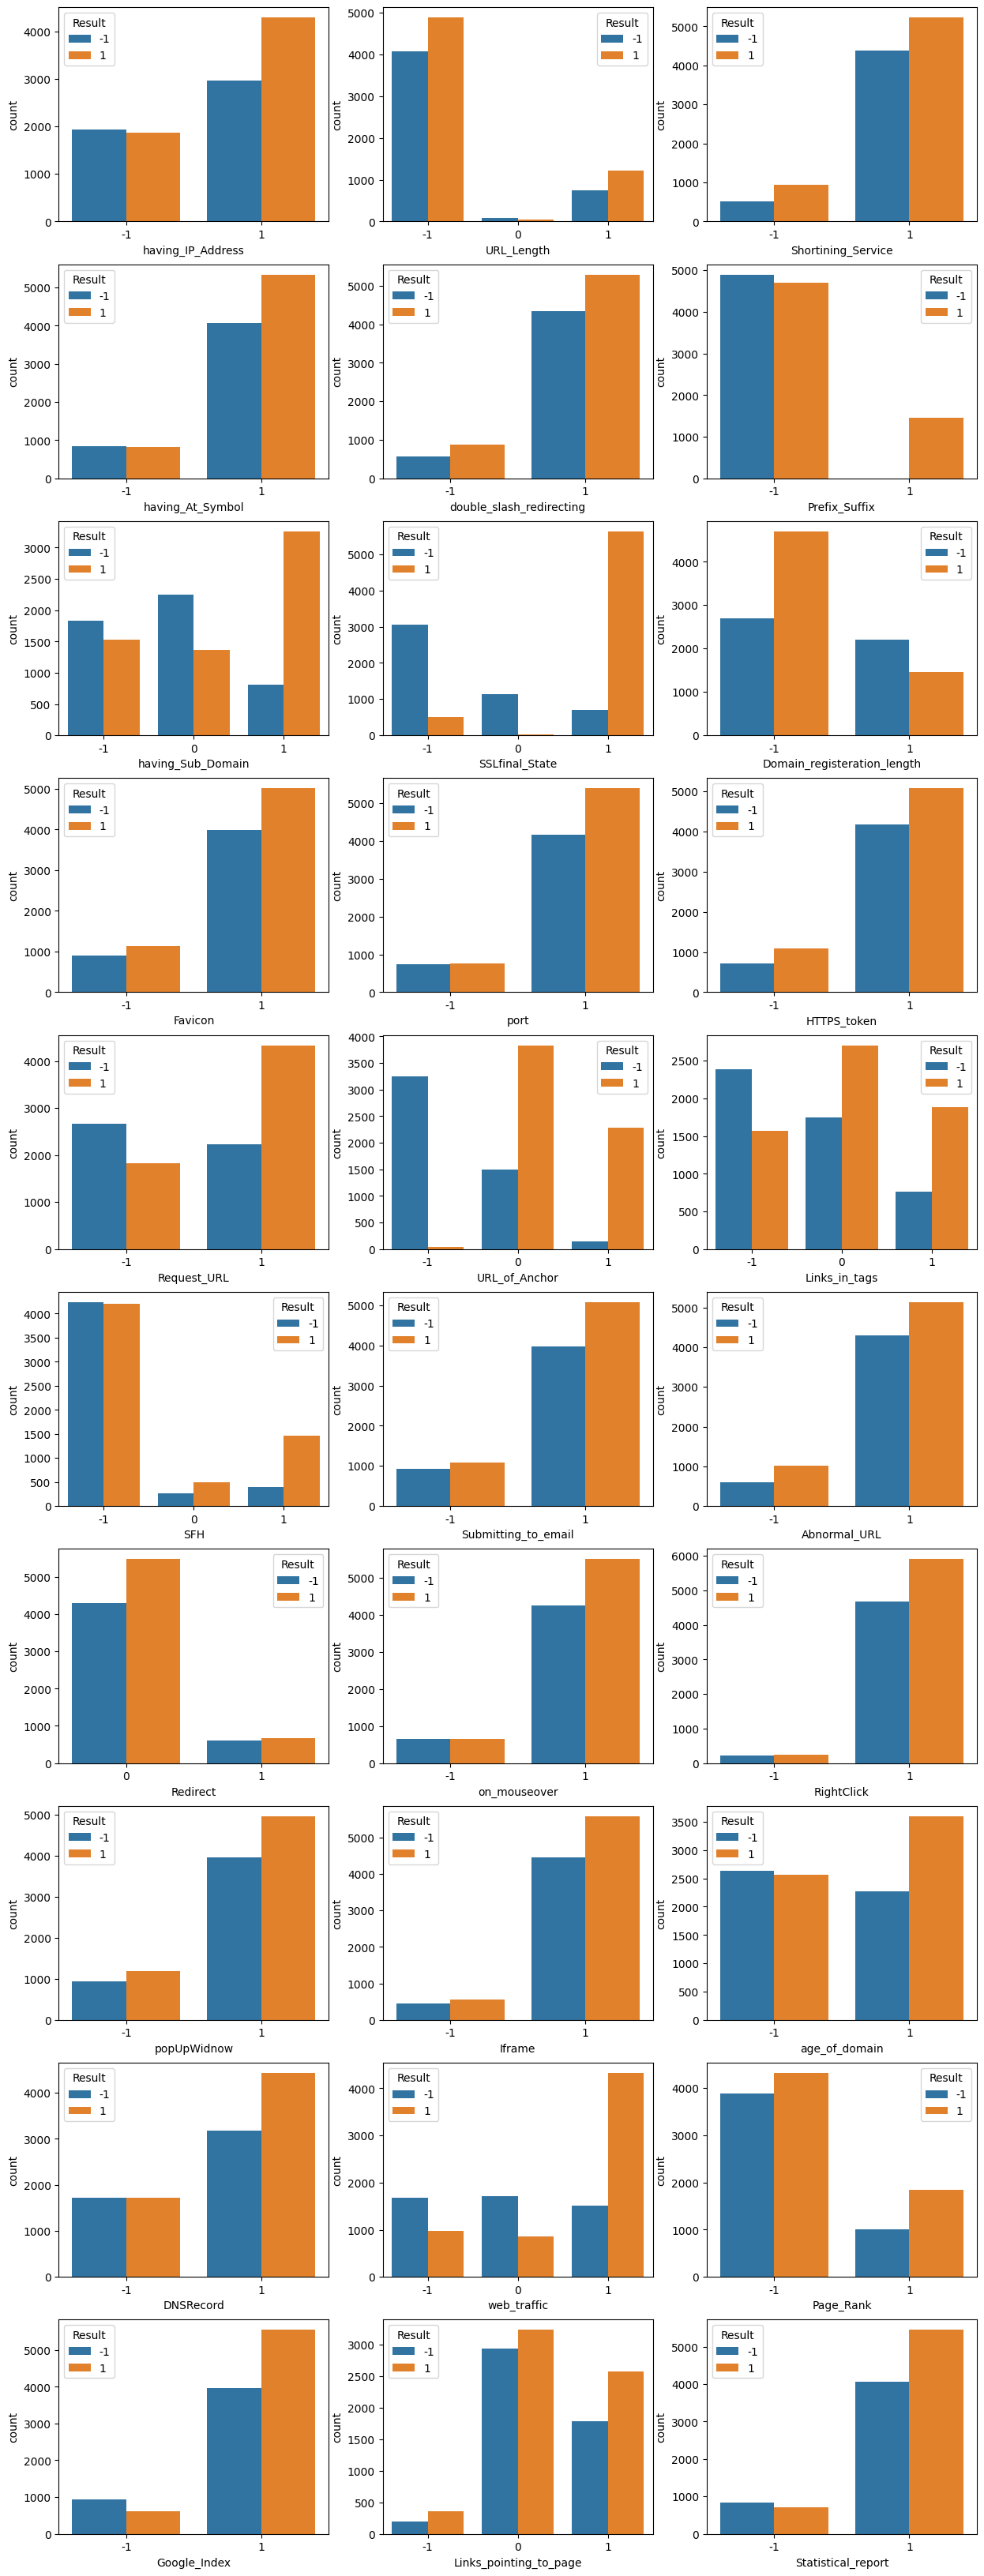

In [11]:
plt.figure(figsize=(15,50))
pltnumber =1

for column in df.drop(['Result'],axis=1):
    ax = plt.subplot(12,3,pltnumber)
    sns.countplot(data = df,x=column,hue='Result')
    plt.xlabel(column,fontsize=10)
    pltnumber+=1
plt.show()

### Observations
- There is strong relation between prefix_suffix and result. If the website is not having '-' in the domain name then there are more chances of it being a legitimate website.
- If there are more than one sub domains then the chances that website being phising website increases.
- SSLfinal state is having strong relation with result and can be important factor in deciding the website phishing.
- If domain registration is more than one year then chances of that website being phishing website is less.
- URL_of_Anchor feature can be critical in determining if a website is phishing or not 

## Finding the realtion between the features and result using statistical method. (Chi-Square Test).

In [16]:
# Specify the categorical features and the target feature
categorical_features = df.drop(columns=['Result']).columns
target_feature = 'Result'

# Create an empty DataFrame to store the chi-square test results
results = pd.DataFrame(columns=['Feature', 'Chi-square stat', 'p-value'])

# Iterate over each categorical feature
for feature in categorical_features:
    # Create a contingency table of the categorical feature and the target feature
    contingency_table = pd.crosstab(df[feature], df[target_feature])
    
    # Perform the chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    
    # Append the results to the DataFrame
    results = results.append({'Feature': feature, 'Chi-square stat': chi2, 'p-value': p_value}, ignore_index=True)


In [17]:
results

,Feature,Chi-square stat,p-value
0,having_IP_Address,97.616128,5.078857e-23
1,URL_Length,57.774681,2.846999e-13
2,Shortining_Service,50.661841,1.097324e-12
3,having_At_Symbol,30.694313,3.020491e-08
4,double_slash_redirecting,16.247156,5.559299e-05
5,Prefix_Suffix,1341.399192,1.139474e-293
6,having_Sub_Domain,1595.294123,0.000000e+00
7,SSLfinal_State,6686.246056,0.000000e+00
8,Domain_registeration_length,562.628588,2.253279e-124
9,Favicon,0.000023,9.961924e-01


In [19]:
# Set the significance level (alpha)
alpha = 0.05

# Filter the features based on their p-values
significant_features = results[results['p-value'] < alpha]['Feature'].tolist()

# Print the significant features
print("Significant Features:")
print(significant_features)
print(len(significant_features))

Significant Features:
['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
25


In [22]:
# storing the important features in the pickel file
model_file = 'model_imp_features_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(significant_features, f)

## Pandas Profiling

In [23]:
profile = ProfileReport(df, title="Profiling Report",explorative=True)
profile.to_file('eda.html')

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 332.59it/s]


In [24]:
relative_path = 'eda.html'

# Generate the hyperlink
html_link = f'<a href="{relative_path}" target="_blank">Click here to open the pandas profiling report</a>'

# Display the hyperlink
display(HTML(html_link))